In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Custom module imports
import acquire
import prepare
import model
α = .05
alpha= .05

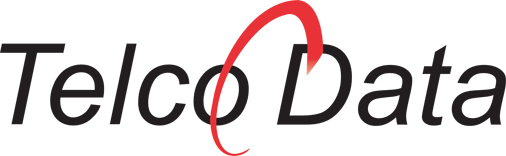

# Project Planning:

•Create README.md with data dictionary, project and business goals, come up with initial hypotheses.

•Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.

•Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.

•Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.

•Establish a baseline accuracy and document well.

•Evaluate models on train and validate datasets.

•Choose the model with that performs the best and evaluate that single model on the test dataset.

•Create csv file 

•Document conclusions, takeaways, and next steps in the Final Report Notebook.

# Business Goals:
Find drivers for customer churn at Telco. Why are customers churning?

Construct a ML classification model that accurately predicts customer churn.

Deliver a report that a non-data scientist can read through and understand what steps were taken, why and what was the outcome? 

# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis

4-Statistical testing 

5-Modeling 

6-Model evaluation

# 1-Data acquistion:

In [2]:
#acuire the data from acquire file
df_telco=acquire.get_telco_data()
df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,2,Yes,2,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,1,Yes,1,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,Yes,1,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,1,Yes,2,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,2,No,2,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,Yes,1,Yes,1,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,1,Yes,2,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,3,No,2,67.85,4627.65,No,Two year,DSL,Mailed check


In [3]:
#optaining all the information for telco
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [4]:
#show all unique values
df_telco.nunique()

customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
internet_service_type_id       3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
contract_type_id               3
paperless_billing              2
payment_type_id                4
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          3
payment_type                   4
dtype: int64

# Acquire takeaways:
1•Optain the dataframe from codeup servers

2•Range index is 7042

3•Monthly charges is a float.

# 2)Preparation:

In [5]:
#preparing the telco dataframe using prepare file
df_telco=prepare.prep_telco(df_telco)

In [6]:
#show only first 5 rows 
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,churn,contract_type,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0002-ORFBO,0,0,1,1,9,1,1,0,1,...,65.6,593.30,0,1,1,0,0,0,0,1
1,0003-MKNFE,1,0,0,0,9,1,2,0,0,...,59.9,542.40,0,12,1,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,1,0,0,...,73.9,280.85,1,12,0,1,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,1,0,1,...,98.0,1237.85,1,12,0,1,0,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,1,0,0,...,83.9,267.40,1,12,0,1,0,0,0,1


In [7]:
#checking info on the new telco dataframe 
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7043 non-null   object 
 1   gender                     7043 non-null   int64  
 2   senior_citizen             7043 non-null   int64  
 3   partner                    7043 non-null   int64  
 4   dependents                 7043 non-null   int64  
 5   tenure                     7043 non-null   int64  
 6   phone_service              7043 non-null   int64  
 7   multiple_lines             7043 non-null   int64  
 8   online_security            7043 non-null   int64  
 9   online_backup              7043 non-null   int64  
 10  device_protection          7043 non-null   int64  
 11  tech_support               7043 non-null   int64  
 12  streaming_tv               7043 non-null   int64  
 13  streaming_movies           7043 non-null   int64

In [8]:
df_telco.head(1).T

,0
customer_id,0002-ORFBO
gender,0
senior_citizen,0
partner,1
dependents,1
tenure,9
phone_service,1
multiple_lines,1
online_security,0
online_backup,1


In [9]:
#spliting the data to 60%,20%,20%
train , validate, test=prepare.my_train_test_split(df_telco,["churn"])
print(f'Train=',train.shape) 
print(f'Validate=',validate.shape) 
print(f'Test=',test.shape) 

Train= (4225, 25)
Validate= (1409, 25)
Test= (1409, 25)


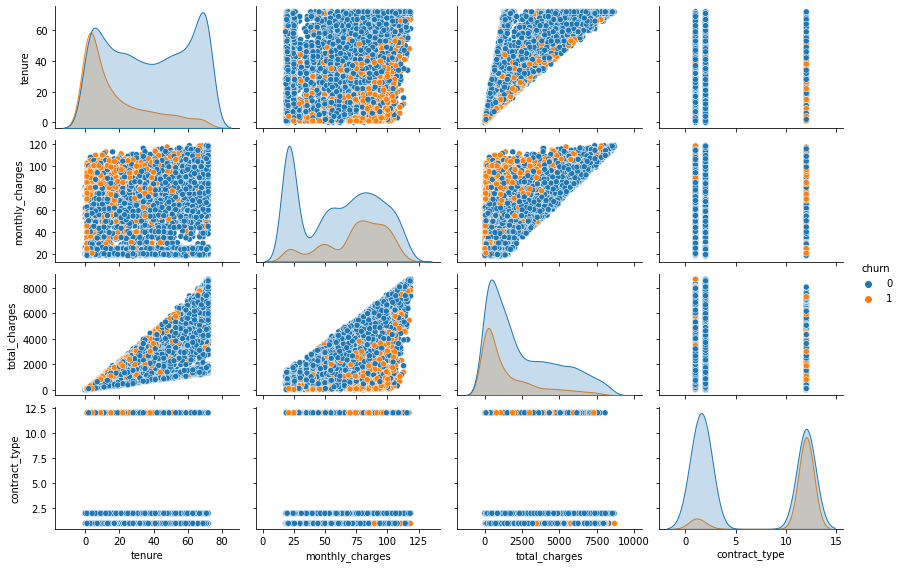

In [10]:
#churn yes or no
sns.pairplot(df_telco[['tenure', 'monthly_charges', 'total_charges', 'churn','contract_type','gender']], 
             hue='churn', height=2, aspect=1.5);

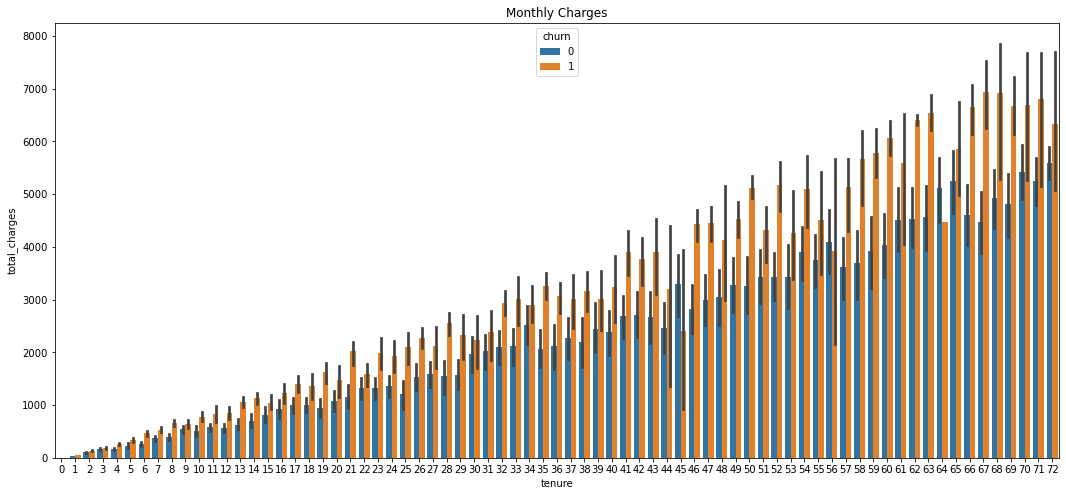

In [11]:
#plotting tenure how many year be in
plt.figure(figsize=(18,8))
# Plot as histogram 
sns.barplot(data=train, x='tenure', y='total_charges', hue='churn')
#title
plt.title("Tenure")
plt.show()

# Prepare Takeaways
1•Gender is not a useful column to me going forward, so I will drop it before I split.

2•split the data into 60,20,20
•
•

# 3)Exploratory data analysis:


`Hypothesis 1 - Monthly charge`:

`Ho` -> Does the higher the monthly charge effect churn?

`Ha`-> The higher the monthly charge doesnt effect churn?

`Hypothesis 2 - Contract type `:

`Ho` -> There is no association between churn and a customer having a longer contract type 

`Ha`-> There is an association between churn and a customer having shorter contract type 


`Hypothesis 3 - Contract type and Monthly charge`:

`Ho` -> There is no association between churn and a customer having high monthly with low contract 

`Ha`-> There is no association between churn and a customer having high monthly with high contract.



# `Hypothesis 1 - Monthly charge`:

`Ho` -> Does the higher the monthly charge effect churn?

`Ha`-> The higher the monthly charge doesnt effect churn?

Two sample, one tail T-Test of churn vs not churn monthly charges

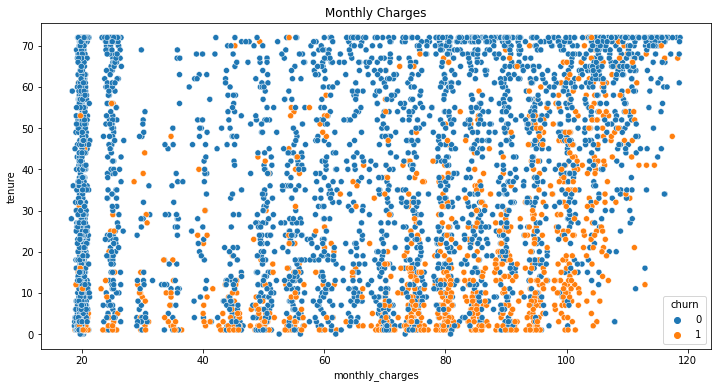

In [12]:
# Making the plot larger churn yes=1 churn no =0
plt.figure(figsize=(12,6))
# Plot as histogram 
sns.scatterplot(data=train, x='monthly_charges',y='tenure',hue='churn')
#title
plt.title("Monthly Charges")
plt.show()

In [13]:
observed = pd.crosstab(train.tenure, train.monthly_charges)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that")
    print("Sufficient evidence to move forward understanding that")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that
Sufficient evidence to move forward understanding that


# Conclusion:

•less people then to churn when the price is lower then higher.

•contract would be usedful for modeling.

•people have a higher churn rate if the price get above 70 

•we all love cheaper prices

# `Hypothesis 2 - Contract type`:

`Ho` -> There is no association between churn and a customer having a longer contract type 

`Ha`-> There is an association between churn and a customer having shorter contract type 

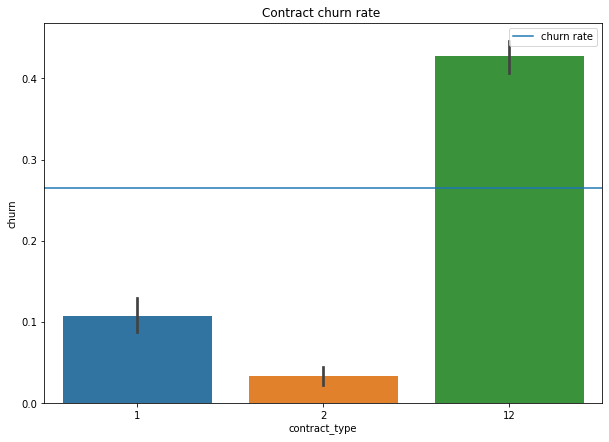

In [14]:
#created a plot of the people who churn with certain contracts
plt.figure(figsize=(10,7))
plt.title("Contract churn rate ")
sns.barplot(x="contract_type", y="churn", data=train)
churn = train.churn.mean()
plt.axhline(churn, label="churn rate")
plt.legend()
plt.show()

In [15]:
observed = pd.crosstab(train.contract_type, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that")
    print("Sufficient evidence to move forward understanding that")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that
Sufficient evidence to move forward understanding that


# Conclusion:

•We reject H0 that the there is no association between churn and a customer having a longer contract term. 

•contract would be usedful for modeling.

•12 month stay with us longer while 2 month then to leave more often.

•seem like people use the 2 month contract to test us out.

# `Hypothesis 3 - Contract type and Monthly charge`:

`Ho` -> There is no association between churn and a customer having high monthly with low contract 

`Ha`-> There is no association between churn and a customer having high monthly with high contract.

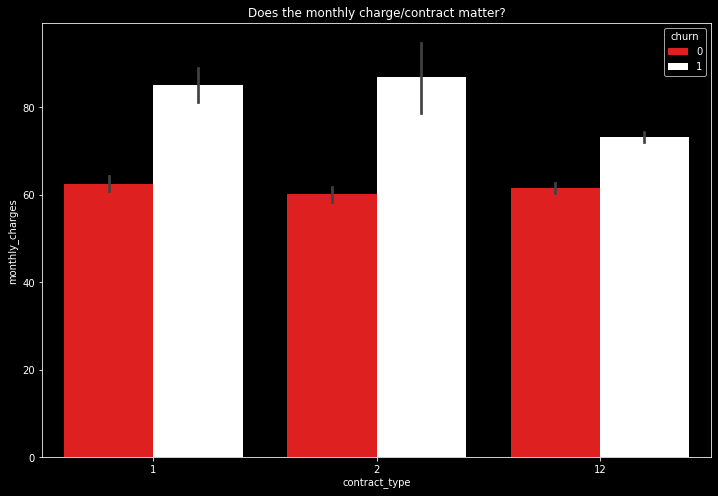

In [17]:
#plotting monthly charges and contract type
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.title('Does the monthly charge/contract matter?')
graph= sns.barplot(x="contract_type", y="monthly_charges", hue="churn",
              palette=["r" ,"w"], data=df_telco)
graph.axhline
plt.show()

# Conclusion 
• both monthly and contractlenght effect churn

• churn rate is lower when customers have a 12 month contract to work with.

• both are very import to churn because both effect churn about equally 

• more people are churning then not churning

# 4)Statistical testing 
•Hypothesis

•alpha = .05

•if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("Evidence suggests that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We find insufficient evidence to support the claim that", alternative_hypothesis)

# `Hypothesis 1 - Monthly charge`:

In [18]:
#samples
sam = train[train.churn == 0]
sam1 = train[train.churn == 1]
# check for equal variances
stat, p = stats.levene(sam.monthly_charges, sam1.monthly_charges)

# evaluate variances on p value
if p < α:
    print('''The two samples are different ''')
else:
    print('''The two samples are similar.''')
print(' ')

The two samples are different 
 


In [19]:
# two-sample, one-tail T-Test
t, p = stats.ttest_ind(sam1.monthly_charges, sam.monthly_charges, equal_var = False)

# evaluate results based on t-statistic and the p-value
if ((t > 0) & (p/2 < α)):
    print('''Reject the Null Hypothesis.
Findings suggest the average monthly charge of a churned customer is higher than customers that have not. ''')
else:
    print('''Fail to reject the Null Hypothesis.''')
    print()

Reject the Null Hypothesis.
Findings suggest the average monthly charge of a churned customer is higher than customers that have not. 


# Conclusion

• Monthly charge ho was rejected so monthly charge shouldn"t have a impact on churn?

• still going to keep monthly charge in my train,val,test

# `Hypothesis 2 - Contract type`:

In [20]:
#samples
sam = train[train.churn == 0]
sam1 = train[train.churn == 1]
# check for equal variances
stat, p = stats.levene(sam.contract_type, sam1.contract_type)

# evaluate variances on p value
if p < α:
    print('''The two samples are different ''')
else:
    print('''The two samples are similar.''')
print(' ')

The two samples are different 
 


In [21]:
# two-sample, one-tail T-Test
t, p = stats.ttest_ind(sam1.contract_type, sam.contract_type, equal_var = False)

# evaluate results based on t-statistic and the p-value
if ((t > 0) & (p/2 < α)):
    print('''Reject the Null Hypothesis.
Findings suggest the average monthly charge of a churned customer is higher than contract type . ''')
else:
    print('''Fail to reject the Null Hypothesis.''')
print()

Reject the Null Hypothesis.
Findings suggest the average monthly charge of a churned customer is higher than contract type . 



# Conclusion:

•We reject H0 that the there is no association between churn and a customer having a longer contract term. 

•contract would be usedful for modeling.


# # `Hypothesis 3 - Monthly charges, Contract type`:

In [22]:
monthly_low = train[train.monthly_charges < 50]
monthly_high = train[train.monthly_charges > 50]
variance = monthly_low.churn.var() == monthly_high.churn.var()
α = .05
t, p = stats.ttest_ind(monthly_low.churn, monthly_high.churn, equal_var=variance)
if p < α:
    print('We reject the null hypothesis.')
else:
    print('The null hypothesis is confirmed')

We reject the null hypothesis.


In [23]:
# two-sample, one-tail T-Test
t, p = stats.ttest_ind(sam1.monthly_charges, sam.contract_type, equal_var = False)

# evaluate results based on t-statistic and the p-value
if ((t > 0) & (p/2 < α)):
    print('''Reject the Null Hypothesis.
Findings suggest the average monthly charge of a churned customer is higher than contract type . ''')
else:
    print('''Fail to reject the Null Hypothesis.''')
print()

Reject the Null Hypothesis.
Findings suggest the average monthly charge of a churned customer is higher than contract type . 



# Statistical testing takeaways:

• Hypothesis 1 - Monthly charges-• Monthly charge ho was rejected so monthly charge shouldnt have a impact on churn?

• Hypothesis 2 - Contract type-•We reject H0 that the there is no association between churn and a customer having a longer contract term. 

• Hypothesis 3 - Monthly charges, Contract type-both monthly and contact the longer theyre the lower the churn rate happens

• Hypothesis 3 - Monthly charges, Contract type-monthly cost could be high at some people but it wont have a big impact if the contract is 12 months to churn rate.

# Baseline:

In [24]:
# determine the percentage of customers that churn/do not churn
baseline = train.churn.value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 73.47%.


# 5)Modeling:

In [25]:
#dropping gender,churn,customer_id cause wont effect the churn rate while optaing the train,val,test
X_train = train.drop(columns=['churn','customer_id','gender','partner'])
y_train = train.churn

X_validate = validate.drop(columns=['churn','customer_id','gender','partner'])
y_validate = validate.churn

X_test = test.drop(columns=['churn','customer_id','gender','partner'])
y_test = test.churn

In [26]:
#pulling from my model.py for the following functions to work.
#creating 3 different models to conclude whichone is the best one 
dt_model1, rf_model, knn1_model = model.score_models(X_train, y_train, X_validate, y_validate)

DecisionTreeClassifier(max_depth=5, random_state=123)

train score: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3104
           1       0.62      0.63      0.63      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.75      0.75      4225
weighted avg       0.80      0.80      0.80      4225

validate score: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.61      0.64      0.63       374

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.80      0.80      0.80      1409

________________________

RandomForestClassifier(max_depth=10)

train score: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3104
           1       0.85      0.73      0.79      1121

    accuracy      

# TRAIN:
|MODEL | ACCURACY/TRAIN | F1 SCORE/TRAIN |
| ----- | ----- | ----- |
|K-Nearest Neighbor|.83|.65|
|Random Forest |.90|.79|
|DecisionTreeClassifier |.80|0.63|

# VALIDATE:
|MODEL | ACCURACY/VALIDATE | F1 SCORE/VALIDATE |
| ----- | ----- | ----- |
|K-Nearest Neighbor|.77|.53|
|Random Forest |.80|.58|
|DecisionTreeClassifier |.80|0.63|

# Modeling takeaways:

•Random forest has the highest dropoff 

•Decisiontreeclassifier has the lowest validation drop off 

• All models got greater then baseline percent of 73%

# 6) Best Model evaluation:
Test My Best Model

Remember, I will only evaluate my single best model, that might mean the least dropoff in accuracy from train to validate rather than the highest accuracy.

In [27]:
#best model we created 
actual_test = y_test
predicted_test = dt_model1.predict(X_test)
print(classification_report(actual_test, predicted_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.60      0.65      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409



# Model evaluation takeaway:

•We went with decisiontree because had a least drop dropoff in accuracy from train to validate.

•Decisiontreeclassifier accuracy 79% which passes our baseline of 73%


# Conclusions & Next Steps

•With baseline of 73%. We identified on why customer are turning away from staying with us or joining our company. As per our analysis the main issues were customers with short term contracts,and customers with higher monthly charge tenth to turn away from stay in the contract longer.

• Short term contract tent to be the highest churn rate out of all our categories

`Next step`

•investigated why customers are leaving within the 12month period of a contract,and if there's another reason why our clientel are leaving more often.

•`Recommendations`

• I recommned that we either lower the price for our longer contracts so that would incourage more customer to stay in a longer commitment or we lower the month to month for more customer to stay in the loing term.

• Our monthly cost should offer deal or sale to increase our customer line up

• Reccommned more contrat lenght instead of just 3. The sweet spot seem to be arround the 3-12 month part so we could make a 6month contract or 4 month contract 

• I reccommend we check this every 6month to make sure our prediction of churn customers is going in the right place

# Create the Predictions CSV:

Create a CSV file with  probability of class,  prediction of churn (1=churn, 0=not_churn)

These predictions should be from your best performing model that you ran on X_test. Note that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.


In [28]:
proba_test = dt_model1.predict_proba(X_test)
proba_df = pd.DataFrame(proba_test, columns=dt_model1.classes_.tolist())
reset_test = test.reset_index()
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df['predicted'] = predicted_test
csv_df = test_proba_df[['customer_id',0,1,'predicted']]
csv_df.head()

,customer_id,0,1,predicted
0,4531-AUZNK,0.841270,0.158730,0
1,2296-DKZFP,0.992526,0.007474,0
2,9692-TUSXH,0.471380,0.528620,1
3,5129-JLPIS,0.471380,0.528620,1
4,1273-MTETI,0.287611,0.712389,1


In [29]:
# Write DataFrame to a csv file for deliverable.
csv_df.to_csv('predictions.csv')

# 